In [67]:
import polars as pl
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
with open("data/animals.json", "r") as data_file:
        data = json.load(data_file)

df = pl.DataFrame(data)

In [69]:
df.head(5)

walks_on_n_legs,height,weight,has_wings,has_tail
i64,f64,f64,bool,bool
2,1.89662,52.244593,false,true
2,1.87068,84.608978,false,true
4,0.151612,7.855076,false,true
2,1.824498,75.800981,false,true
4,0.2799,46.757356,false,true


In [70]:
df.describe()

statistic,walks_on_n_legs,height,weight,has_wings,has_tail
str,f64,f64,f64,f64,f64
"""count""",1000.0,1000.0,1000.0,1000.0,1000.0
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",2.995,1.492775,1146.052381,0.258,0.985
"""std""",1.024707,1.337228,2046.772823,null,null
"""min""",1.0,0.136315,0.075579,0.0,0.0
"""25%""",2.0,0.384633,6.241849,null,null
"""50%""",3.0,1.617079,57.774582,null,null
"""75%""",4.0,2.513869,727.215039,null,null
"""max""",5.0,9.83936,6897.044478,1.0,1.0


# Dummify boolean columns

In [71]:
df = df.with_columns([
    pl.col(col).cast(pl.Float64) for col in df.columns if df.schema[col] == pl.Boolean
])

In [72]:
df.head(5)

walks_on_n_legs,height,weight,has_wings,has_tail
i64,f64,f64,f64,f64
2,1.89662,52.244593,0.0,1.0
2,1.87068,84.608978,0.0,1.0
4,0.151612,7.855076,0.0,1.0
2,1.824498,75.800981,0.0,1.0
4,0.2799,46.757356,0.0,1.0


# Plotting

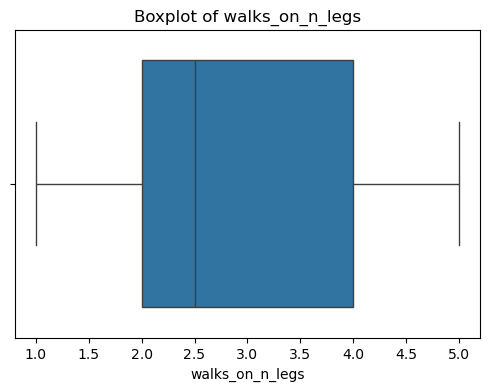

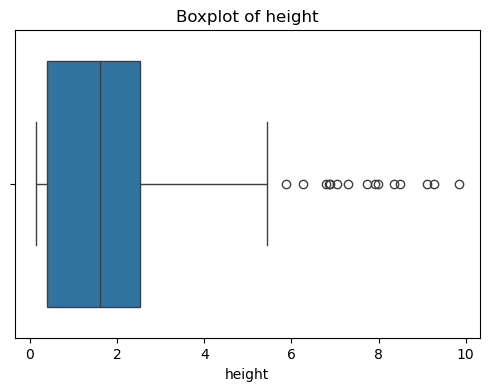

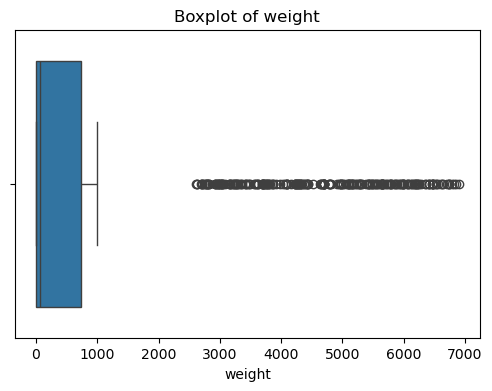

In [73]:
for column in ['walks_on_n_legs', 'height', 'weight']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [74]:
def remove_outliers_iqr(df: pl.DataFrame, column: str) -> pl.DataFrame:
    
    q1 = df.select(pl.col(column).quantile(0.25, "nearest")).item()
    q3 = df.select(pl.col(column).quantile(0.75, "nearest")).item()
    
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    return df.filter((pl.col(column) >= lower) & (pl.col(column) <= upper))

In [75]:
clean_df = df.clone()
for col in ['walks_on_n_legs', 'height', 'weight']:
    clean_df = remove_outliers_iqr(clean_df, col)

In [77]:
clean_df.describe()

statistic,walks_on_n_legs,height,weight,has_wings,has_tail
str,f64,f64,f64,f64,f64
"""count""",747.0,747.0,747.0,747.0,747.0
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",2.674699,0.912058,45.55323,0.331995,0.990629
"""std""",0.970028,0.751317,75.976438,0.471245,0.096413
"""min""",1.0,0.136315,0.075579,0.0,0.0
"""25%""",2.0,0.331891,3.145788,0.0,1.0
"""50%""",2.0,0.503814,44.04709,0.0,1.0
"""75%""",4.0,1.714025,65.353391,1.0,1.0
"""max""",5.0,4.619763,839.574007,1.0,1.0


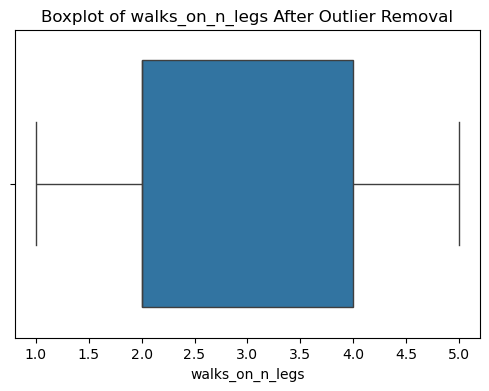

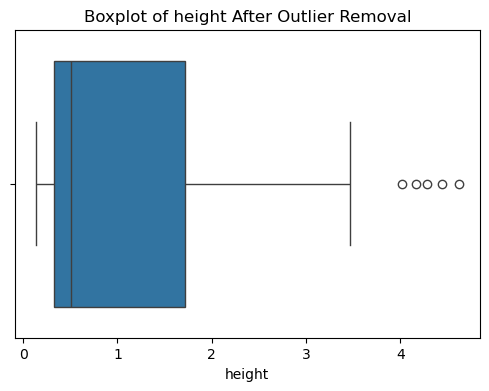

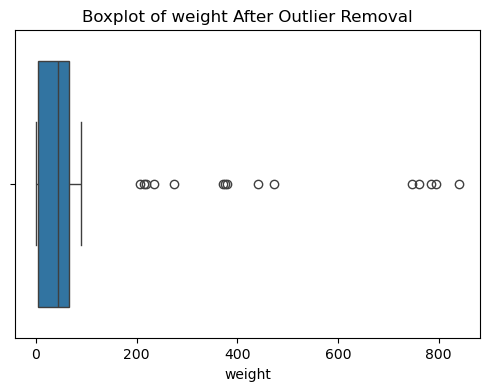

In [78]:
for column in ['walks_on_n_legs','height', 'weight']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=clean_df[column])
    plt.title(f'Boxplot of {column} After Outlier Removal')
    plt.show()